# **FINAL PROJECTS**
**Topic:** House Price Prediction\
**Class:** 21KDL\
**Group:** Lazyyyy

# THÀNH VIÊN
|    MSSV     |     Họ và Tên    |
|-------------|------------------|
|21280018     | Trần Phi Hùng    |
|21280097     | Nguyễn Hoài Linh |
|21280059     | Trần Thị Bích Tuyền|
|21280082     | Nguyễn Thị Yến Như|
|21280122     | Trần Trịnh Mai Vy|

## **Introduction to the topic**

Hiện nay, nhu cầu bất động sản ở Việt Nam đang tăng lên do nhiều nguyên nhân như nhu cầu về mua nhà để ở, đầu tư bất động sản hoặc nhu cầu thuê nhà. Các thành phố lớn như Hà Nội và TP.HCM đang trở thành điểm đến hấp dẫn cho các nhà đầu tư vì tiềm năng phát triển kinh tế và tăng trưởng dân số. Trong cả nước, các dự án bất động sản được đầu tư liên tục, bao gồm các khu dân cư, chung cư, khu phức hợp thương mại và các khu công nghiệp. Ngoài ra, nhu cầu về các loại bất động sản cao cấp cũng đang tăng lên do nhu cầu của giới thượng lưu và người nước ngoài.

Hơn nữa nhận thấy rằng, nhu cầu cầu bất động sản về nhà ở luôn là một trong những nhu cầu thiết yếu của cuộc sống. Trong đó, giá nhà là một trong những yếu tố quan trọng nhất trong quyết định mua nhà hoặc đầu tư bất động sản và thường có những biến động phức tạp và khó đoán trước trên thị trường bất động sản. Việc dự đoán giá nhà sẽ giúp người mua nhà và nhà đầu tư đưa ra quyết định thông minh và được tối ưu hóa. Người dân thông thường cũng có nhu cầu dự đoán giá nhà để chuẩn bị cho việc mua nhà trong tương lai hoặc định giá cho nhà của mình. Đồng thời, việc dự đoán giá nhà sẽ giúp cho các chuyên gia có thể dự báo được xu thế giá và phân tích thị trường một cách chính xác hơn. Các nhà đầu tư bất động sản, các công ty tài chính và ngân hàng cần phải định giá bất động sản để đưa ra quyết định về vấn đề cho vay và đầu tư. Việc dự đoán giá nhà sẽ giúp họ đưa ra các quyết định này một cách chính xác và an toàn hơn. Chính vì thế, việc xây dựng một model đự đoán giá nhà là rất hữu ích và cần thiết. Lợi ích của model dự đoán giá nhà mang lại:
- Hỗ trợ người mua nhà và nhà đầu tư trong việc đưa ra quyết định thông minh và nắm bắt được xu thế giá nhà trên thị trường.

- Giúp các chuyên gia bất động sản và các chuyên gia đầu tư phân tích thị trường bất động sản một cách chính xác và hiệu quả hơn.

- Xác định giá trị cũng như tiềm năng phát triển của một căn nhà cụ thể hoặc của một khu vực bất động sản nào đó.

- Cung cấp thông tin hữu ích cho các công ty, ngân hàng và tổ chức tài chính trong việc đánh giá và định giá bất động sản.

- Hỗ trợ trong việc tạo ra các kế hoạch đầu tư và phát triển bất động sản.

- Cải thiện quá trình quản lý rủi ro và giảm rủi ro cho các nhà đầu tư bất động sản.

- Cung cấp dữ liệu và thông tin cho các lĩnh vực khác như bảo hiểm nhà, định giá tài sản và dịch vụ kế toán.

-> Tóm lại, mô hình dự đoán giá nhà là một công cụ hữu ích và cần thiết để giúp người mua,các chuyên gia bất động sản và các nhà đầu tư có thể hiểu rõ hơn về thị trường bất động sản và đưa ra quyết định đầu tư và kinh doanh thông minh hơn.


In [2]:
#Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import pandas as pd
import folium
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.neighbors import KernelDensity
from folium.plugins import HeatMap
import branca.colormap as cm
from geopy.geocoders import Nominatim
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
%matplotlib inline

## **Data Collection:**
1.   Scrape and collect data items from the website https://batdongsan.vn/ban-nha/ to create a comprehensive dataset.
2.  Explore the website thoroughly to gather relevant information on each data item for house price prediction.
3.  Determine the size of the dataset to be collected.

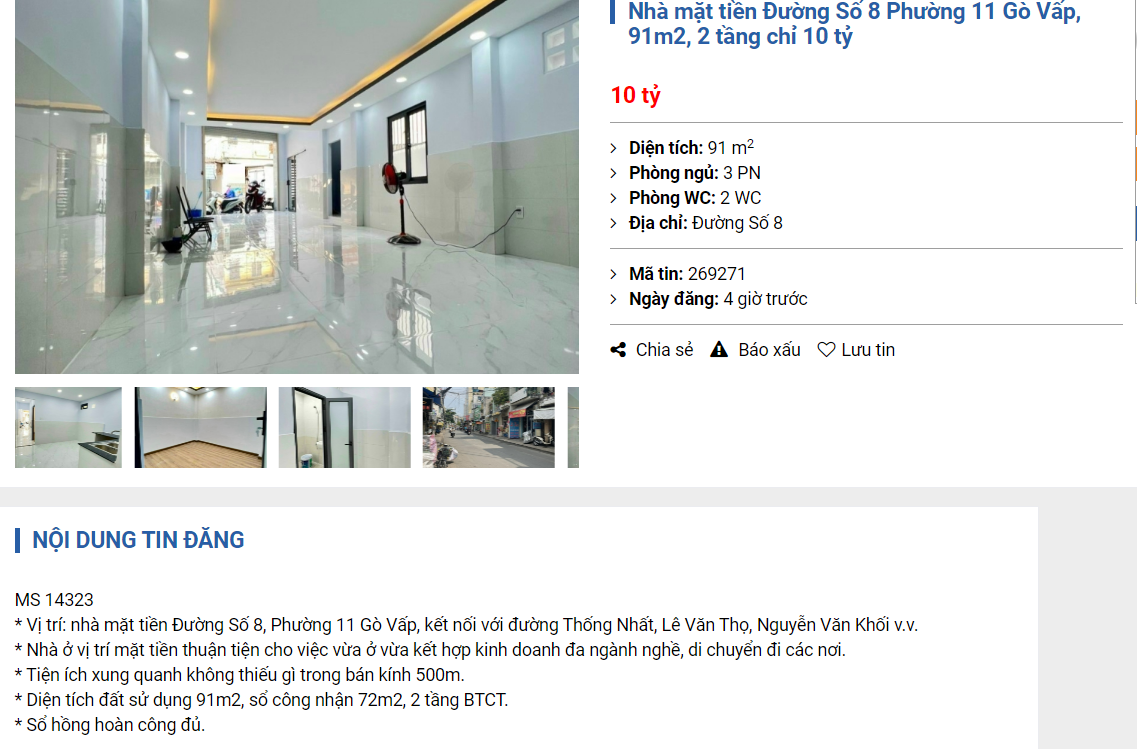

Dựa trên thông tin của website ta có thể nhận thấy rằng dữ liệu bất động sản bao gồm giá nhà  và một số thuộc tính khác như số phòng ngủ, số tầng, địa chỉ.. Từ đó ta có thể sử dụng thư viện **Beautifulsoup, request, regex** trong python để lấy dữ liệu cần.

1.   Thao tác lấy giá nhà từ website
> Ví dụ từ website: *Đô Thị Định Công, 75M2*5T, MT 5.5M, **12.6 Tỷ**, Phân Lô, ÔTô Tránh, Vỉa Hè, Kinh Doanh, 0974014486*

Trong wedsite thì giá được format trong **class_='price'** nhưng kết quả trả về có thể là thỏa thuận, số tiền tỷ, số tiền triệu, và còn có rất nhiều trường hợp người dùng nhập sai dữ liệu. Chính vì thế giá nhà sẽ được lấy từ title và content để có thể dễ thực hiện so sánh và xử lý sau này.
**Ví dụ** như đoạn code dưới đây là lấy giá nhà từ title

``` python
    billion = 0
    million = 0
    matches = re.findall(r'(\d+\w*([.,]{1}\d*\w*){0,1}){1}\s*(tỷ|tỉ|ty){1}\s*(\d*\w*)', title, re.IGNORECASE)
    if matches:
        try:
            billion = str(matches[0][0]).replace(',', '.')
        except:
            a = 0
        try:
            if matches[0][-1] != '':
                million = str(matches[0][-1]).replace(',', '.')
        except:
            a = 0
        try:
            data['price_title'] = str(float(billion) + int(million)/ 1000)
        except:
            if matches != '':
                if million == 0:
                    data['price_title'] = str(billion)
                else:
                    data['price_title']  = str(billion) + '.' + str(million)
    else:
        matches = re.findall(r'(\d+)\s*(triệu|trieu|tr){1}', title, re.IGNORECASE)
        if matches:
            data['price_title'] = str(float(matches[0][0]) / 1000)
```
Với ví dụ của title trên thì ta thu được giá nhà là 12.6 và cách lấy từ content cũng tương tự.

2.   Thao tác lấy số phòng ngủ
Nhận thấy cũng có rất nhiều trang không để số phòng ngủ trên 'class body', nhưng dữ liệu có thể để số phòng trong content, để lấy được số phòng này thì chúng ta có thể dùng code sau:
```python
    match = re.findall(r'(\d+){1}\s*(pn|phòng ngủ|phong ngu){1}', text, re.IGNORECASE)
    if match:
        PN = 0
        for i in range(len(match)):
            PN += int(match[i][0])
        info['Phòng ngủ'] = PN
```
Vì có nhiều content để số phòng của từng tầng nên chúng ta sẽ dùng code thế này.

3. Thao tác lấy số phòng vệ sinh
Tương tự như cách lấy số phòng ngủ đối với việc phòng lấy phòng vệ sinh thực hiện lại các thao tác sau
``` python
    match = re.findall(r'(\d+){1}\s*(wc|phong wc|phong ve sinh|phòng vệ sinh){1}', text, re.IGNORECASE)
    if match:
        WC = 0
        for i in range(len(match)):
            PN += int(match[i][0])
        info['Phòng WC'] = WC
```

4. Thao tác lấy số tầng
Đối với số tầng thì trong 'class body' không hế có, mà chúng ta chỉ có thể lấy nói từ title và content, trong khi đó có rất nhiều khách hàng để là tầng, hoạc là lầu, hoặc là vừa lầu vừa trệt và số liệu nayf không được format đúng vì thế nên đoạn code để lấy thông tin này sẽ là:
``` python
    match = re.search(r'(\d+)\s*(tầng)', text, re.IGNORECASE)
    if match:
        info['Số tầng'] = match.group(1)
    else:
        info['Số tầng'] = 0
    # Lấy thông tin về số lầu
    match = re.search(r'(\d+)\s*(lầu)', text, re.IGNORECASE)
    if match:
        info['Số lầu'] = match.group(1)
    else:
        info['Số lầu'] = 0
    match = re.search(r'(\d+)\s*(trệt)', text, re.IGNORECASE)
    if match:
        info['trệt'] = match.group(1)
    else:
        info['trệt'] = 0
    if info['Số tầng'] == 0:
        if info['Số lầu'] == 0 and info['trệt'] != 0 :
            info['Số tầng'] = int(info['trệt']) + 1
        if info['trệt'] == 0 and info['Số lầu'] != 0:
            info['Số tầng'] = int(info['Số lầu']) + 1
        if info['trệt'] != 0 and info['Số lầu'] != 0:
            info['Số tầng'] = int(info['Số lầu']) + int(info['trệt'])
```

5. Thao tác lấy diện tích
Đối với diện tích thì có thể để lấy từ 'class body' nhưng chúng cũng có rất nhiều thông tin sai lệch thực tế , vì thế nên chúng ta cần lấy thêm thông tin diện tích từ content để có thể kiểm tra số diện tích hợp lý. Dưới đây là code lấy thông tin diện tích từ content và cũng chính vì người dùng nhập đa dạng số liệu diện tích:
```python
    match = re.search(r'((DT:|diện tích:)\s*[\d.]+)|([\d.]\s*+(m2)+)', text, re.IGNORECASE)
    if match:
        info['Diện tích'] = match.group(1)
```

6. Thao tác lấy các tiện ích xung quanh.
Tương tự như vậy chúng ta lấy tiện ích như là có gần trường, bệnh viện, chợ(siêu thị), gần khu dân cư, mức độ an ninh,...



## **Website Data Preprocessing and Feature Engineering**
Link code Tiền xử lí data website:
1.Như các thuộc tính đã được lấy từ trên, thì chúng ta sẽ lấy tất cả các thuộc tínhh đó để huấn luyện mô hình, gồm có là: 'Tinh/TP', 'Quan/Huyen', 'PN', 'WC', 'area', 'floor', 'price_', 'Tien_ich'.
2. Như ở trên thì chúng ta lấy giá nhà từ ba nguồn chỗ khác nhau thế nên chúng ta cần có bước xử lý để có thể lấy dữ liệu hợp lý nhất.

```python
data.loc[(data['price'] >= 1000000) & (data['price'] <= 15000000), 'price'] /= 1000000
data['price_'] = data['price']

# Kiểm tra giá trị của cột 'price_' và thực hiện các điều kiện
for i, row in data.iterrows():
    if row['price_'] < 0.5:
        if max(row['giá'], row['price_title']) >=1:
            max_value = max(row['giá'], row['price_title'])
            data.at[i, 'price_'] = max_value
        else:
            data.at[i, 'price_'] = row['price']
    elif 100 <= row['price_'] <= 1000:
        if 1 <= row['giá'] <= 100 and 1 <= row['price_title'] <= 100:
            data.at[i, 'price_'] = row['giá']
        else:
            if 1 <= row['giá'] <= 100:
                data.at[i, 'price_'] = row['giá']
            else:
                if 1 <= row['price_title'] <= 100:
                    data.at[i, 'price_'] = row['price_title']
                else:
                    data.at[i, 'price_'] = row['price']
    elif 1000 <= row['price_'] <= 10000:
        if 1 <= row['giá'] <= 100 and 1 <= row['price_title'] <= 100:
            data.at[i, 'price_'] = row['giá']
        else:
            if 1 <= row['giá'] <= 100:
                data.at[i, 'price_'] = row['giá']
            else:
                if 1 <= row['price_title'] <= 100:
                    data.at[i, 'price_'] = row['price_title']
                else:
                    data.at[i, 'price_'] = row['price']
    elif row['price_'] > 10000:
        if 1 <= row['giá'] <= 500 and 1 <= row['price_title'] <= 500:
            data.at[i, 'price_'] = row['giá']
        elif 1 <= row['price_title'] <= 500:
            data.at[i, 'price_'] = row['price_title']
        elif 1 <= row['giá'] <= 500:
            data.at[i, 'price_'] = row['giá']
        else:
            data.at[i, 'price_'] = row['price']
    else:
        data.at[i, 'price_'] = row['price']
```

Với đoạn code trên là đang tạo cột dữ liệu price_ mới được tạo ra từ việc chọn lọc các dữ liệu ở 3 nguồn thông tin.

Chẳng hạn như nếu số giá mang giá trị trong khoảng tỷ thì có thể người dùng đã nhập lộn đơn vị nên mình sẽ chia cho 1000000.

Khi giá < 0.5 thì có để đã có sự nhằm lẫn giữa đơn vị tỷ và triệu của người dùng, thế nên ta sẽ kiểm tra lại hai cột giá tại title và content.Còn khi dữ liệu từ 100 trở lên có thể là đúng cũng có thể là bị sai dấu chấm hoặc dư số không, vì thế nên chúng ta cũng cần kiểm tra lại gái trị của cột giá ở hai nơi còn lại.

Nhưng nhìn lại thì chúng ta đã lấy được hết các dữ liệu của wed, bây giờ chỉ còn là những điểm dữ liệu nhiễu, và rác mà thôi.
3. Loại bỏ dữ liệu rác.
Nhận thấy không có căn nhà nào có diện tích thấp hơn 10m2.
Các nhà có giá tiền thấp hơn 0.3 toàn bộ điều là nhà thuê, và cũng không có nhà lớn hơn 1000 tỷ
```python
data = data[data['price_'] >= 0.3]
data = data[data['area'] >= 10]
data = data[data['price_'] < 1000]
```


Nhận thấy thông tin miêu tả của hàm describe() thì ta thấy giá trị của cột area và price_ có sự biến động lớn, để đảm bảo tránh các dữ liệu nhiễu ta thực hiện lọc outlier cho hai dữ liệu area và price_
``` python
Q1 = data['area'].quantile(0.25)
Q3 = data['area'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Lọc và xóa các outlier
data = data[(data['area'] >= lower_bound) & (data['area'] <= upper_bound)]

Q1 = data['area'].quantile(0.25)
Q3 = data['area'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Lọc và xóa các outlier
data = data[(data['area'] >= lower_bound) & (data['area'] <= upper_bound)]

Q1 = data['price_'].quantile(0.25)
Q3 = data['price_'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Lọc và xóa các outlier
data = data[(data['price_'] >= lower_bound) & (data['price_'] <= upper_bound)]
```

## **Methodology**

### **EDA (KHÁM PHÁ DỮ LIỆU THÔ)**

In [3]:
# Lấy dữ liệu từ file CVS
Realestate= pd.read_csv('Data_Realestate.csv')
Realestate.head(10)

,Tinh/TP,Quan/Huyen,PN,WC,area,floor,Tien_ich,price_
0,Hà Nội,Hà Đông,NaN,NaN,35.0,5.0,2,4.20
1,Hà Nội,Đống Đa,4.0,NaN,34.0,4.0,2,3.80
2,TP Hồ Chí Minh,Thủ Đức,3.0,NaN,50.0,3.0,2,4.50
3,TP Hồ Chí Minh,Gò Vấp,5.0,NaN,64.0,5.0,2,7.70
4,Đồng Nai,Biên Hòa,2.0,NaN,200.0,1.0,2,7.20
5,Hải Phòng,Lê Chân,2.0,2.0,66.0,2.0,2,19.10
6,Hà Nội,Hà Đông,2.0,NaN,39.0,4.0,3,4.70
7,TP Hồ Chí Minh,Quận 11,2.0,NaN,25.0,5.0,1,5.40
8,TP Hồ Chí Minh,Hóc Môn,3.0,2.0,510.0,1.0,2,0.51
9,TP Hồ Chí Minh,Tân Phú,3.0,NaN,48.0,3.0,1,3.90


In [ ]:
# Xem thông tin dữ liệu
Realestate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7902 entries, 0 to 7901
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tinh/TP     7902 non-null   object 
 1   Quan/Huyen  7902 non-null   object 
 2   PN          6439 non-null   float64
 3   WC          4895 non-null   float64
 4   area        7902 non-null   float64
 5   floor       7902 non-null   float64
 6   Tien_ich    7902 non-null   int64  
 7   price_      7902 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 494.0+ KB



Dựa vào thông tin về dữ liệu mà chúng ta đã thu thập, ta có thể phân tích như sau:

**Dữ liệu bao gồm 8 cột và 7902 hàng (entries). Mỗi cột đại diện cho một thuộc tính khác nhau trong dữ liệu.**

Các cột và mô tả của chúng là:

>**Tinh/TP**: Đây là cột chứa thông tin về Tỉnh/Thành phố. Dữ liệu trong cột này không có giá trị null (non-null count = 7902).

>**Quan/Huyen**: Đây là cột chứa thông tin về Quận/Huyện. Dữ liệu trong cột này không có giá trị null (non-null count = 7902).

>**PN**: Đây là cột chứa thông tin về PN. Dữ liệu trong cột này có 6200 giá trị non-null, tức là có 1463 giá trị null.

>**WC**: Đây là cột chứa thông tin về WC. Dữ liệu trong cột này có 4606 giá trị non-null, tức là có 3007 giá trị null.

>**area**: Đây là cột chứa thông tin về diện tích (area). Dữ liệu trong cột này không có giá trị null (non-null count = 7902).

>**floor**: Đây là cột chứa thông tin về số tầng (floor). Dữ liệu trong cột này không có giá trị null (non-null count = 7902).

>**Tien_ich**: Đây là cột chứa thông tin về tiện ích (Tien_ich). Dữ liệu trong cột này không có giá trị null (non-null count = 7902).

>**price_**: Đây là cột chứa thông tin về giá (price_). Dữ liệu trong cột này không có giá trị null (non-null count = 7902).

In [4]:
# Xem thông tin dữ liệu
Realestate.describe()

,PN,WC,area,floor,Tien_ich,price_
count,6439.000000,4895.000000,7902.000000,7902.000000,7902.000000,7902.000000
mean,3.749340,3.259857,98.419584,2.932169,2.038471,10.221519
std,3.465837,3.997789,1165.993425,1.767875,1.432810,38.781731
min,1.000000,0.000000,10.000000,1.000000,0.000000,0.300000
25%,2.000000,2.000000,44.000000,2.000000,1.000000,3.800000
50%,3.000000,3.000000,60.000000,3.000000,2.000000,5.500000
75%,4.000000,4.000000,85.000000,4.000000,3.000000,7.857500
max,111.000000,111.000000,100103.000000,30.000000,7.000000,950.000000


Nhận thấy thông tin miêu tả của hàm describe() thì ta thấy giá trị của cột area và price_ có sự biến động lớn, để đảm bảo tránh các dữ liệu nhiễu ta thực hiện lọc outlier cho hai dữ liệu area và price_

In [5]:
Q1 = Realestate['area'].quantile(0.25)
Q3 = Realestate['area'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Lọc và xóa các outlier
Realestate = Realestate[(Realestate['area'] >= lower_bound) & (Realestate['area'] <= upper_bound)]

In [5]:
Q1 = Realestate['price_'].quantile(0.25)
Q3 = Realestate['price_'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Lọc và xóa các outlier
Realestate = Realestate[(Realestate['price_'] >= lower_bound) & (Realestate['price_'] <= upper_bound)]

1. Trực quan các đặc trưng dữ liệu để thấy được sự tương quan giữa các dữ liệu

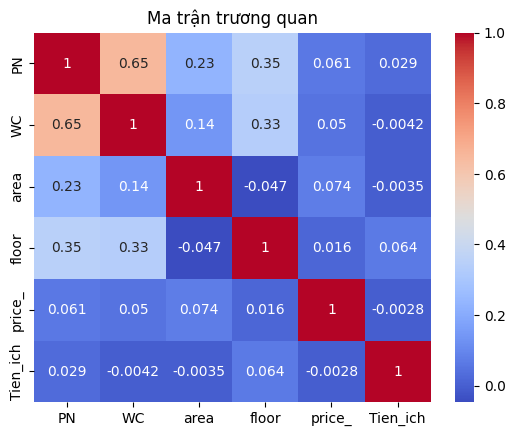

In [6]:

# Tạo DataFrame mẫu
data_corr = Realestate[['PN','WC','area','floor', 'price_','Tien_ich']]
#df = pd.DataFrame(data)

# Tạo ma trận trương quan
corr_matrix = data_corr.corr()

# Vẽ ma trận trương quan bằng heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Ma trận trương quan")
plt.show()

**Nhận xét**\
Từ ma trận hiệp phương sai trên ta có thể nhận thấy rằng mức độ tương so với giá nhà quan thông qua các thông số sao:
1. PN có hệ số tương quan là 0.46 chứng tỏ sự ảnh hưởng đến giá nhà là khá cao, giá trị của một căn nhà có thể tăng giảm theo số lựơng phòng ngủ
2. WC có hệ số tương quan là 0.48 tương tự như PN chứng tỏ sự ảnh hưởng đến giá nhà là khá lớn, giá trị của một căn nhà có thể tăng giảm theo số lựơng phòng vệ sinh.
3. area có hệ số tương quan là 0.32 tuy rằng trên thực tế mức độ ảnh hưởng theo chúng ta vẫn thường nghĩ là khá cao nhưng đối với dữ liệu này thì chỉ số tương quan đối với giá thành thấp nhất.
4. floor có hệ số tương quan là 0.32 đối với số phòng thì sự ảnh hưởng tương đối đối với giá nhà.



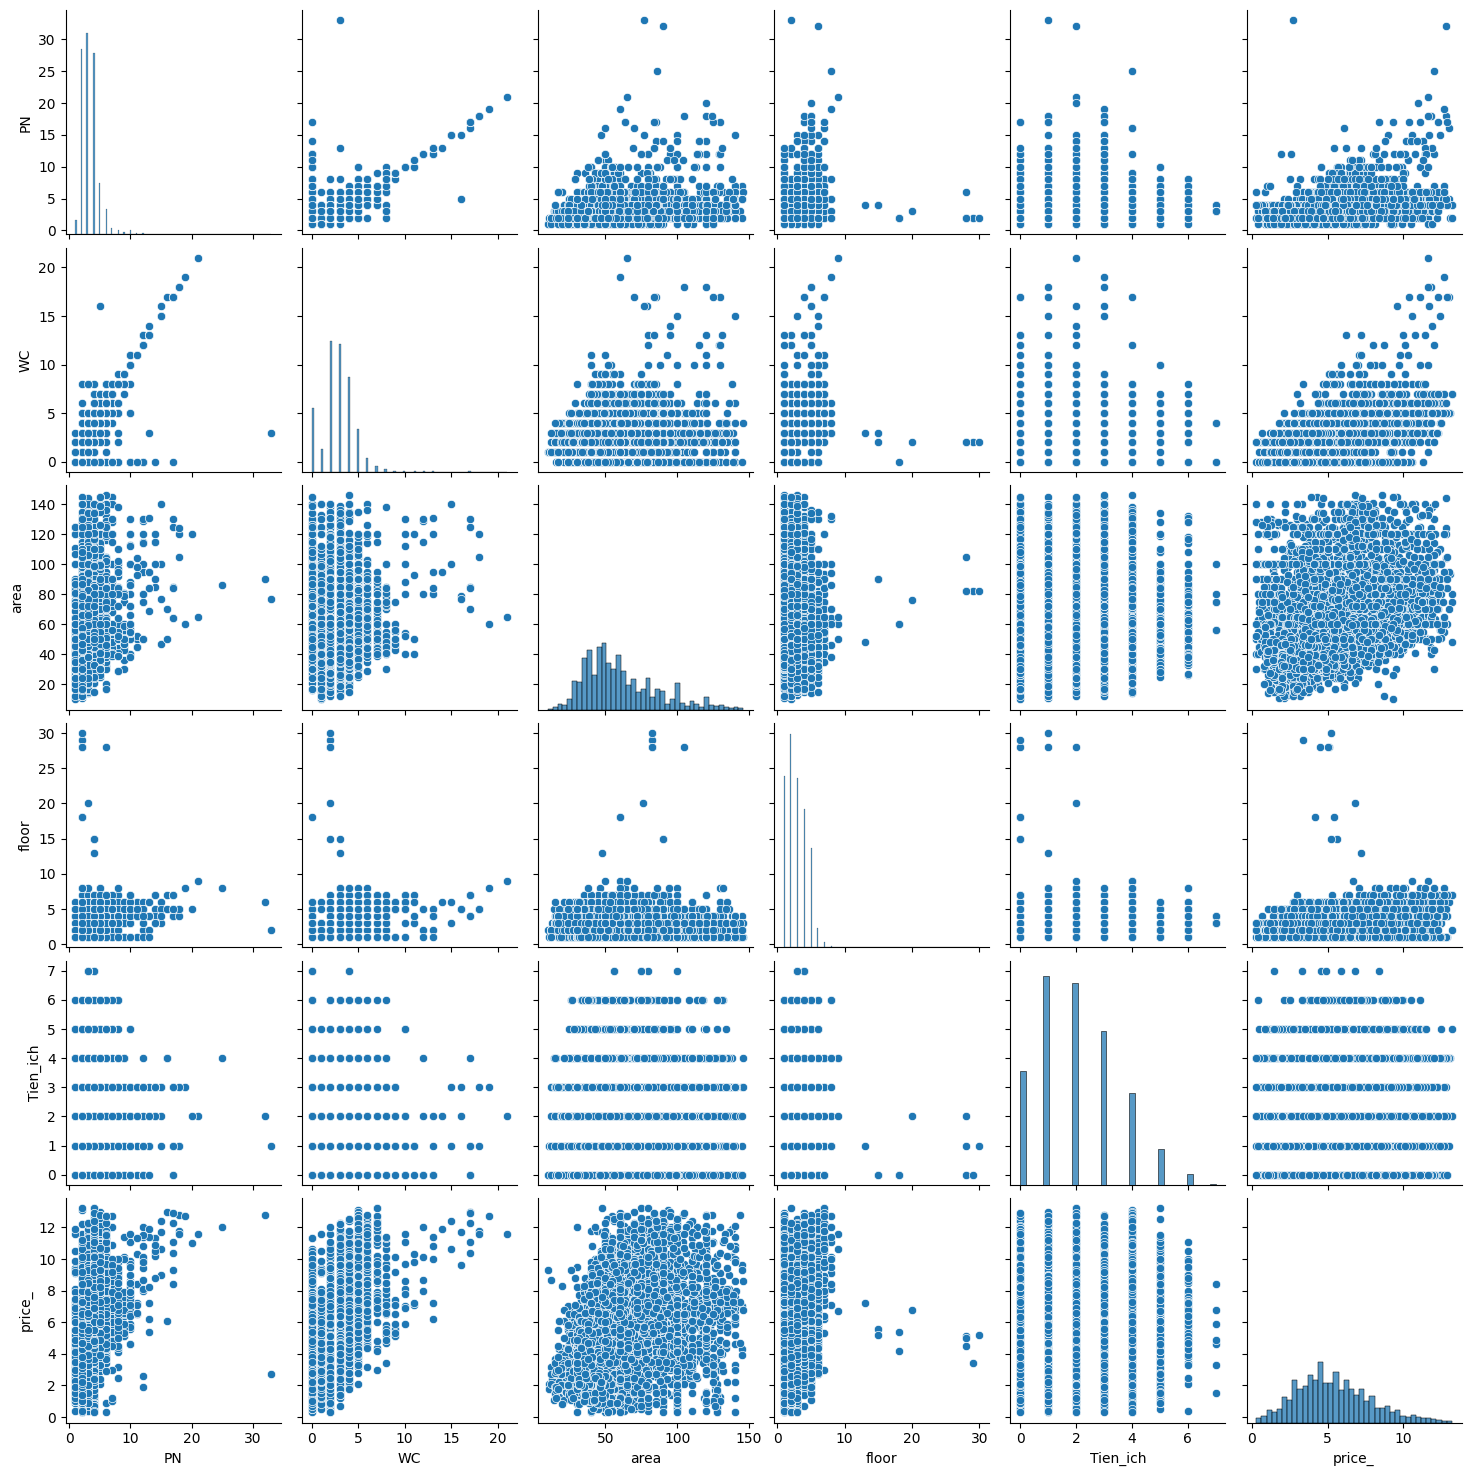

In [ ]:
sns.pairplot(Realestate)

2. Trực quan dữ liệu tổng thể bằng Bản đồ nhiệt sử dụng KDE



> - Chuyển đổi địa chỉ của từng ngôi nhà thành các toạ độ trên bản đồ 2D




```python

# Đọc tệp CSV
df = pd.read_csv("Data_Realestate.csv")
df['dia_chi'] = df['Tinh/TP'] + ', ' + df['Quan/Huyen']

# Tạo một kết nối đến Nominatim
geolocator = Nominatim(user_agent="my-app")

# Định nghĩa một hàm để xác định tọa độ từ địa chỉ
def get_lat_long(address):
    try:
        # Xác định địa chỉ
        location = geolocator.geocode(address, timeout=10)

        # Nếu địa chỉ không hợp lệ
        if not location:
            return None

        # Nếu địa chỉ hợp lệ
        return (location.latitude, location.longitude)
    except:
        return None

# Xác định các địa chỉ hợp lệ và lưu vào dataframe mới
valid_addresses = []
latitudes = []
longitudes = []
prices = []
for i, row in df.iterrows():
    address = row["dia_chi"]
    price = row["price_"]
    location = get_lat_long(address)
    if location is not None:
        valid_addresses.append(address)
        latitudes.append(location[0])
        longitudes.append(location[1])
        prices.append(price)

# Tạo dataframe mới với các địa chỉ hợp lệ và cột "price_"
df_valid = pd.DataFrame({
    "dia_chi": valid_addresses,
    "latitude": latitudes,
    "longitude": longitudes,
    "price_": prices
})

# Lưu dataframe mới vào CSV
df_valid.to_csv("address.csv", index=False)



> - Sử dụng thư viện KernelDensity trong Sklearn với toạ độ của mỗi điểm


In [7]:

# Load data from CSV file
df = pd.read_csv("address.csv")

# Initialize map with the center coordinates at Vietnam
geolocator = Nominatim(user_agent='myapplication')
location = geolocator.geocode('Vietnam')
m = folium.Map(location=[location.latitude, location.longitude], zoom_start=6)

# Calculate kernel density estimate from the coordinate points
X = df[['latitude', 'longitude']].values
kde = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(X)

# Generate grid coordinates for each point on the map
step_size = 0.01
min_lat, max_lat = X[:, 0].min(), X[:, 0].max()
min_lon, max_lon = X[:, 1].min(), X[:, 1].max()
lat_points = np.arange(min_lat, max_lat, step_size)
lon_points = np.arange(min_lon, max_lon, step_size)

grid_coords_list = []
for lat in lat_points:
    for lon in lon_points:
        grid_coords_list.append([lat, lon])

grid_coords = np.array(grid_coords_list)
z = np.exp(kde.score_samples(grid_coords))

# Create a LinearColormap from blue to red
gradient = {0.0: 'blue', 0.5: 'yellow', 1.0: 'red'}
colormap = cm.LinearColormap(colors=['blue', 'yellow', 'red'], index=[0.0, 0.5, 1.0], vmin=0, vmax=max(z)).to_step(10)

# Generate heatmap data with density probability for each point
data = df[['latitude', 'longitude']].values.tolist()
heatmap_data = [[point[0], point[1], 1.0] for point in data]

# Plot the heatmap with computed density probabilities
heatmap = HeatMap(data=heatmap_data,
                  min_opacity=0.0,
                  max_zoom=20,
                  radius=10,
                  blur=5,
                  max_val=max(z))

# Create a color bar indicating the house price density
colormap.caption = 'Mật độ giá nhà'
colormap.add_to(m)

# Set the position of the color bar to the top right
colormap.position = 'topright'

# Add the heatmap and color bar to the map
m.add_child(heatmap)
m.add_child(colormap)

# Display the map
m


: 

: 

**Đánh giá dữ liệu:**

1. Mật độ cao: Các vùng có mật độ cao trên heatmap là Hà Nội và TPHCM cho thấy tập trung lớn của các điểm dữ liệu. Điều này có thể cho thấy sự phát triển đô thị hoặc khu vực có hoạt động tập trung đông dân cư. Những vùng này có thể là trung tâm thành phố, khu vực thương mại hay nơi có nhu cầu nhà ở cao do đó ở đây mật độ nhà bán ra và giá bán cao hơn các khu vực khác.

2. Mật độ thấp: Các vùng có mật độ thấp trên heatmap như Đà Nẵng, Huế cho thấy sự thưa thớt của các điểm dữ liệu. Điều này có thể cho thấy các nhu cầu nhà ở và tập trung dân cư ở các khu vực này tương đối thấp hơn.

3. Biên giới: Heatmap cung cấp cho chúng ta cái nhìn tổng quan về ranh giới giá nhà trong dữ liệu. Các vùng có mật độ khác nhau trên bản đồ heatmap có thể cho thấy sự chênh lệch giữa các khu vực chẳng hạn như ở TPHCM và Hà Nội giá nhà ở hai nơi có sự chênh lệch gần như khá cao nhau mặc dù đều là trung tâm lớn.
Điều này chứng tỏ rằng TPHCM là một trung tâm quan trọng với nhu cầu nhà ở tương đối cao đồng thời đi đôi với mức thu nhập, mức sống cao.


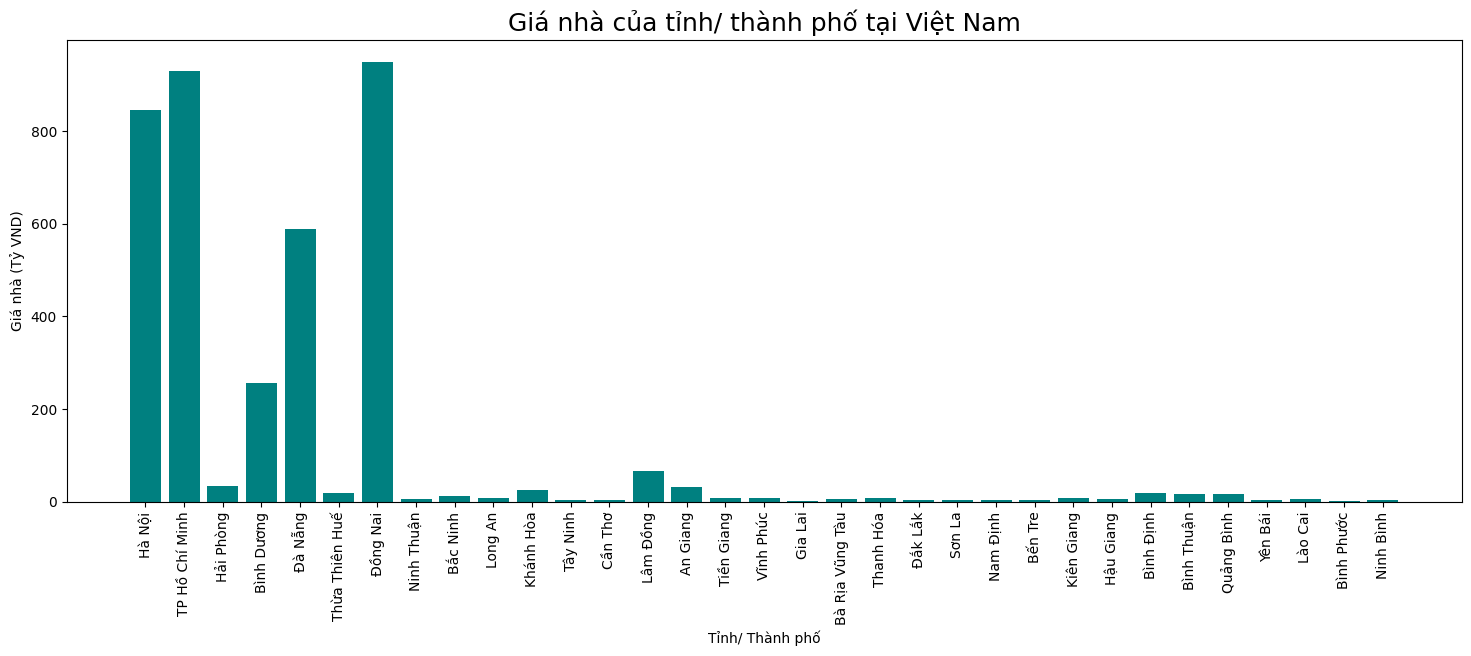

In [7]:
plt.figure(figsize = (18,6))
plt.xticks(rotation=90)
plt.bar(Realestate['Tinh/TP'], Realestate['price_'], color='teal')
plt.title("Giá nhà của tỉnh/ thành phố tại Việt Nam",size = 18)
plt.xlabel("Tỉnh/ Thành phố")
plt.ylabel("Giá nhà (Tỷ VND)")
plt.show()


Qua biểu đồ, có thể nhận thấy rằng giá nhà từ dữ liệu thu thập được có sự chêch lệch cao thấp không đồng đều giữa các tỉnh thành trong nước. Các thành phố lớn như Hà Nội và Thành phố Hồ Chí Minh, Đà Nẵng, Hải Phòng có giá nhà cao hơn nhiều so với các tỉnh miền núi hay đồng bằng thấp hơn. Điều này là do ảnh hưởng bởi các điều kiện kinh tế, xã hội ở những thành phố lớn phát triển hơn nhiều so với các tỉnh thành còn lại. Ngoài ra, giá nhà có thể thay đổi theo thời gian và tình hình thị trường bất động sản, chính sách quy hoạch và phát triển của chính phủ, cùng với những yếu tố kinh tế và chính trị khác trong khu vực và trên thế giới.

Tuy nhiên, giá nhà cũng phụ thuộc vào vị trí, diện tích, thiết kế, độ mới, độ cao của nhà cũng như nhiều yếu tố khác khác như tiện ích xung quanh, giao thông, giáo dục, y tế, an ninh, văn hóa, địa lý, v.v. Chúng ta tiến hành xây dựng model đựa trên các thuộc tính dự liệu thu thập được từ thông tin căn một căn nhà như là: Diện tích, số tầng lầu, số phòng ngủ, số nhà vệ sinh, vị trí, các tiện ích xung quanh gồm: gần trung tâm, chợ, trường học, bệnh viện, nằm trong khu dân trí, an ninh,... ứng với các features trong dataset 'PN','WC','area', 'floor', 'Tinh/Thanh pho','Tien_ich', 'Quan/ Huyen' để dự đoán giá nhà 'price_'

### **TIỀN XỬ LÝ DỮ LIỆU PHÂN TÍCH**

#### **Xử lý Missing Data**

In [8]:
from sklearn.impute import KNNImputer

# Tạo thêm cột mới là hiệu giữa PN và WC
Realestate['PN_minus_WC'] = Realestate['PN'] - Realestate['WC']

# Chọn các thuộc tính cần xử lý
features = ['PN', 'WC', 'area', 'floor', 'price_', 'Tien_ich', 'PN_minus_WC']
X = Realestate[features].values

# Sử dụng thuật toán KNN để điền các giá trị bị thiếu
X_imputed = KNNImputer(n_neighbors=5).fit_transform(X)
X_imputed = np.round(X_imputed).astype(int)
# Gán các giá trị đã được điền vào dataframe ban đầu

Realestate[features] = X_imputed
Realestate.drop('PN_minus_WC', inplace=True, axis=1)

#### **Mã hoá dữ liệu chuỗi và StandarScaler số**

In [9]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
numeric_features = ['area', 'PN', 'WC', 'floor', 'Tien_ich']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Xác định các cột định danh và định lượng
categorical_features = ['Tinh/TP', 'Quan/Huyen']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Kết hợp các transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])



#### **Chuẩn hoá dữ liệu, split data trainning and test**

In [11]:
X = Realestate.drop(['price_'], axis=1)
y = Realestate['price_']
# Train split dữ liệu thành data train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=104)
X_train

,Tinh/TP,Quan/Huyen,PN,WC,area,floor,Tien_ich
4465,TP Hồ Chí Minh,Bình Tân,3,0,120,3,3
6252,TP Hồ Chí Minh,Gò Vấp,3,3,40,2,2
6662,TP Hồ Chí Minh,Tân Phú,3,4,45,4,1
2057,TP Hồ Chí Minh,Gò Vấp,3,3,38,4,1
210,Hà Nội,Cầu Giấy,3,4,35,1,3
...,...,...,...,...,...,...,...
680,TP Hồ Chí Minh,Bình Thạnh,4,4,48,3,0
5821,TP Hồ Chí Minh,Quận 10,3,3,67,2,0
762,Thừa Thiên Huế,Huế,4,4,55,5,1
6313,Đà Nẵng,Hải Châu,2,1,59,1,4


### **MÔ HÌNH DỰ ĐOÁN GIÁ NHÀ**

#### **MÔ HÌNH DỰ ĐOÁN SỬ DỤNG LINEAR REGRESSION**

**1. Thuật toán**


Thuật toán Linear Regression bao gồm các bước sau:

1. **Chuẩn bị dữ liệu**: Tập dữ liệu huấn luyện gồm các cặp (x, y) với x là biến đầu vào và y là biến đầu ra. Trước khi áp dụng Linear Regression, dữ liệu thường cần được tiền xử lý bằng cách chuẩn hóa, xử lý dữ liệu bị thiếu, hoặc loại bỏ nhiễu (noise).

2. **Xây dựng mô hình**: Linear Regression tìm kiếm một đường thẳng (trong trường hợp 2 biến) hoặc một siêu mặt phẳng (trong trường hợp nhiều hơn 2 biến) tốt nhất để dự đoán giá trị đầu ra dựa trên biến đầu vào. Mô hình Linear Regression có dạng:

   - Trong trường hợp 1 biến: $y = w_0 + w_1x$
   - Trong trường hợp nhiều hơn 1 biến: $y = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n$

   Trong đó, $w_0, w_1, w_2, ..., w_n$ là các tham số mô hình cần tìm.

3. **Huấn luyện mô hình**: Để tìm ra các giá trị tối ưu của các tham số $w_0, w_1, w_2, ..., w_n$, thuật toán sử dụng phương pháp tối thiểu hóa hàm mất mát. Hàm mất mát thường được sử dụng trong Linear Regression là Mean Squared Error (MSE) hoặc Sum of Squared Errors (SSE). Thuật toán thực hiện việc điều chỉnh các tham số mô hình để giảm thiểu giá trị của hàm mất mát.\

4. **Dự đoán**: Sau khi mô hình Linear Regression được huấn luyện, nó có thể được sử dụng để dự đoán giá trị đầu ra cho các mẫu dữ liệu mới bằng cách đưa biến


In [ ]:
# Tạo pipeline cho mô hình học máy.
pipeline_ln = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('linear_reg', LinearRegression())
])
pipeline_ln.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['area', 'PN', 'WC', 'floor',
                                                   'Tien_ich']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Tinh/TP', 'Quan/Huyen'])])),
                ('linear_reg', LinearRegression())])

**2. Thông số kỹ thuật**

a. Hệ số Xác định hoặc R-Bình phương (R2):
$$
R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
$$

Nó cho biết phần trăm phương sai của biến phụ thuộc có thể được giải thích bằng mô hình hồi quy.

Giá trị của R2 nằm trong khoảng từ 0 đến 1. Các giá trị R2 khác nhau có ý nghĩa như sau:
>R2 = 1: Mô hình hoàn toàn phù hợp với dữ liệu và có thể giải thích toàn bộ sự biến thiên của biến phụ thuộc.

>R2 = 0: Mô hình không giải thích được bất kỳ sự biến thiên nào trong biến phụ thuộc, tức là không có mối quan hệ giữa biến đầu vào và biến đầu ra.

>0 < R2 < 1: Mô hình giải thích được một phần biến thiên của biến phụ thuộc, với giá trị càng gần 1 thể hiện mức độ phù hợp cao hơn.


In [ ]:
y_pred = pipeline_ln.predict(X_test)
r2_score_ln = r2_score(y_test, y_pred)
print('Giá trị r2 của mô hình Linear:', r2_score_ln)

Giá trị r2 của mô hình Linear: 0.5980887934754798


b. Độ lỗi trung bình giữa giá trị dự đoán và giá trị thực tế (MSE):
$$
\text{MSE} = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2
$$

- Nó đo lường độ lớn trung bình của sai số dự đoán giữa giá trị thực tế và giá trị được dự đoán bởi mô hình.

- Giá trị MSE càng nhỏ, tức là sai số dự đoán giữa mô hình và dữ liệu thực tế càng nhỏ, và mô hình có độ chính xác cao hơn. MSE thường được sử dụng để đánh giá mô hình hồi quy và so sánh giữa các mô hình khác nhau để chọn mô hình tốt nhất.


In [ ]:
mse_ln = mean_squared_error(y_test, y_pred)
print('Giá trị MSE của mô hình Linear:', mse_ln)

Giá trị MSE của mô hình Linear: 2.576237767687613


c. Lỗi bình phương trung bình gốc (RMSE):
$$
\text{RMSE} = \sqrt{MSE}= \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}
$$

- Nó đo lường độ lớn trung bình của sai số dự đoán giữa giá trị thực tế và giá trị được dự đoán bởi mô hình.

- RMSE được tính bằng cách lấy căn bậc hai của lỗi bình phương trung bình (MSE).

- Giá trị RMSE càng nhỏ, tức là sai số dự đoán giữa mô hình và dữ liệu thực tế càng nhỏ, và mô hình có độ chính xác cao hơn. RMSE thường được sử dụng để đánh giá mô hình và so sánh giữa các mô hình khác nhau để chọn mô hình tốt nhất.


In [ ]:
rmse_ln = np.sqrt(mse_ln)
print('Giá trị RMSE của mô hình Linear:', rmse_ln)

Giá trị RMSE của mô hình Linear: 1.605066281400121


**3. Trực quan và đánh giá mô hình**

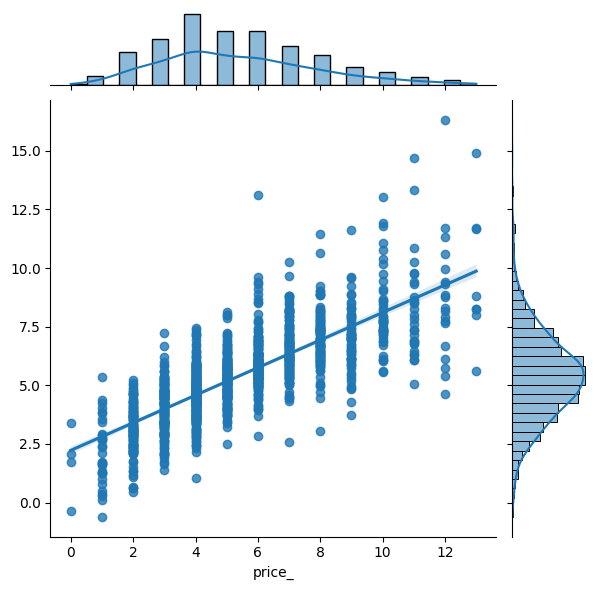

In [ ]:
predictions = pipeline_ln.predict(X_test)
sns.jointplot(x=y_test, y=predictions, kind='reg')


#### **MÔ HÌNH DỰ ĐOÁN SỬ DỤNG RANDOM FOREST**

1. Thuật toán

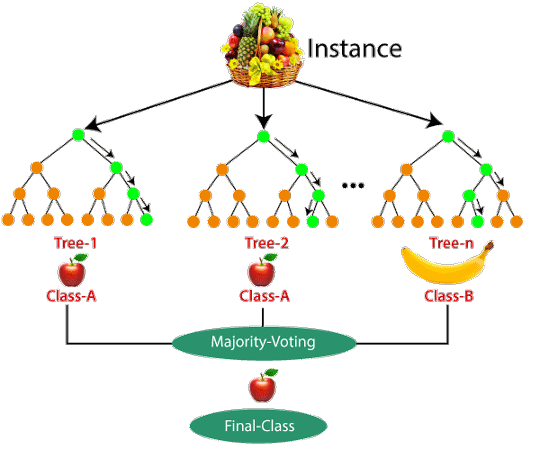


Thuật toán Random Forest bao gồm các bước sau:

1. **Random Sampling**: Từ tập dữ liệu huấn luyện ban đầu, một tập dữ liệu con (bootstrap sample) được tạo ra bằng cách lấy ngẫu nhiên các mẫu từ tập dữ liệu gốc. Mẫu này có kích thước giống với tập dữ liệu huấn luyện ban đầu, nhưng một số mẫu có thể được lựa chọn nhiều lần, trong khi một số mẫu khác có thể không được chọn.

2. **Building Decision Trees**: Một cây quyết định (decision tree) được xây dựng trên từng tập dữ liệu con thu được từ bước trước. Quá trình xây dựng cây này sử dụng thuật toán cây quyết định, như C4.5 hoặc CART, và thường có các quy tắc phân đoạn dựa trên độ tách (splitting criterion) như Gini Index hoặc Information Gain.

3. **Ensemble Learning**: Các cây quyết định riêng lẻ được kết hợp thành một Random Forest bằng cách thực hiện việc dự đoán dựa trên đa số phiếu bầu từ các cây. Kết quả dự đoán cuối cùng được tính bằng cách sử dụng phiếu bầu của tất cả các cây.

4. **Feature Randomness**: Trong quá trình xây dựng mỗi cây quyết định, chỉ một phần các đặc trưng (features) được sử dụng để đưa ra quyết định tại mỗi nút trong cây. Điều này giúp giảm sự ảnh hưởng của các đặc trưng nhiễu và tăng tính đa dạng của các cây trong Random Forest.

5. **Prediction**: Sau khi Random Forest được huấn luyện, nó có thể được sử dụng để dự đoán nhãn (cho bài toán phân loại) hoặc giá trị (cho bài toán dự đoán) cho các mẫu dữ liệu mới bằng cách sử dụ


In [ ]:
# Tạo pipeline cho mô hình học máy.
pipeline_Rd = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('RF_reg', RandomForestRegressor( n_estimators=100,random_state=42))
])
pipeline_Rd.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['area', 'PN', 'WC', 'floor',
                                                   'Tien_ich']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Tinh/TP', 'Quan/Huyen'])])),
                ('RF_reg', RandomForestRegressor(random_state=42))])

2. Thông số kỹ thuật

a. Hệ số Xác định hoặc R-Bình phương (R2):
$$
R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
$$

In [ ]:
y_pred = pipeline_Rd.predict(X_test)
r2_random = r2_score(y_test, y_pred)
print('Giá trị r2 của mô hình Random Forest:', r2_random)

Giá trị r2 của mô hình Random Forest: 0.7231299258133885


b. Độ lỗi trung bình giữa giá trị dự đoán và giá trị thực tế (MSE):
$$
\text{MSE} = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2
$$

In [ ]:
mse_random = mean_squared_error(y_test, y_pred)
print('Giá trị MSE của mô hình Random Forest:', mse_random)

Giá trị MSE của mô hình Random Forest: 1.7747281744892156


c. Lỗi bình phương trung bình gốc (RMSE):
$$
\text{RMSE} = \sqrt{MSE}= \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}
$$

In [ ]:
rmse_random = np.sqrt(mse_random)
print('Giá trị RMSE của mô hình Random Forest:', rmse_random)

Giá trị RMSE của mô hình Random Forest: 1.3321892412451077


3. Trực quan và đánh giá mô hình

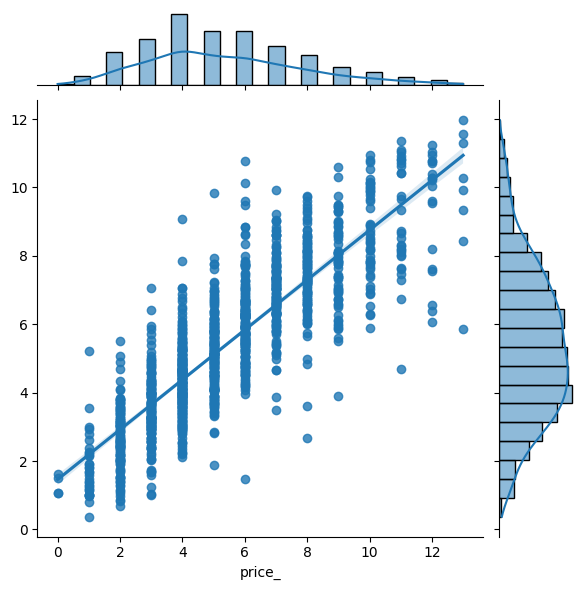

In [ ]:
predictions = pipeline_Rd.predict(X_test)
sns.jointplot(x=y_test, y=predictions, kind='reg')

#### **MÔ HÌNH DỰ ĐOÁN GRADIENT BOOSTINHG**

1. Thuật toán

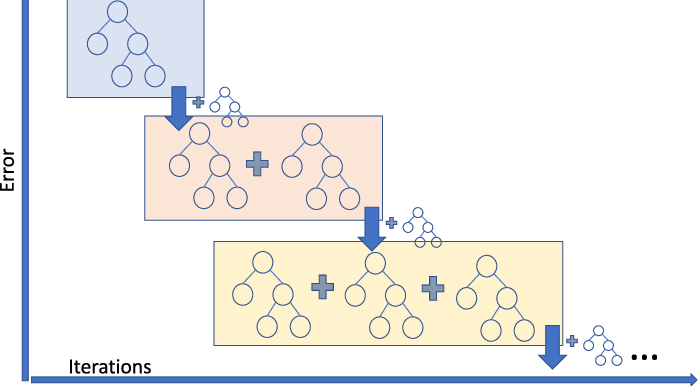


Thuật toán Gradient Boosting bao gồm các bước sau:

1. **Khởi tạo mô hình**: Mô hình Gradient Boosting bắt đầu với một dự đoán ban đầu đơn giản, thường là giá trị trung bình của biến đầu ra trong tập dữ liệu huấn luyện. Đây sẽ là dự đoán đầu tiên của mô hình.

2. **Tính toán gradient và hàm mất mát**: Để xác định sự khác biệt giữa dự đoán hiện tại và giá trị thực tế, gradient của hàm mất mát được tính toán. Hàm mất mát thường được sử dụng là Mean Squared Error (MSE) hoặc Log Loss. Gradient cho biết hướng và mức độ cần điều chỉnh dự đoán hiện tại để giảm thiểu hàm mất mát.

3. **Xây dựng cây quyết định yếu**: Một cây quyết định yếu (weak decision tree) được xây dựng để dự đoán sai số (residuals) còn lại sau dự đoán hiện tại. Cây quyết định yếu thường có độ sâu nhỏ và được xây dựng bằng cách chia các nút dựa trên độ tách (splitting criterion) như Gini Index hoặc Information Gain.

4. **Tính toán hệ số học (learning rate)**: Một hệ số học được tính toán để kiểm soát tốc độ học của thuật toán. Hệ số học quyết định mức độ ảnh hưởng của các cây quyết định yếu đối với dự đoán cuối cùng.

5. **Cập nhật dự đoán**: Dự đoán cuối cùng là tổng của tất cả các dự đoán từ các cây quyết định yếu trước đó, nhưng được điều chỉnh bởi hệ số học. Điều này cho phép mô hình tạo ra một dự đoán tốt hơn cho biến đầu ra.

6. **Cải thiện mô hình**: Tiếp tục từ bước trước, mô hình Gradient Boosting sẽ tiếp tục cải thiện dự đoán bằng cách lặp lại các bước 2-5. Điều này đồng nghĩa với việc thêm các cây quyết định yếu mới vào mô hình và cập nhật dự đoán cuối cùng để giảm thiểu sai số.

7. **Kết hợp dự đoán**: Các dự đoán từ tất cả các cây quyết định yếu được kết hợp lại để tạo ra dự đoán cuối cùng của mô hình Gradient Boosting. Cách kết hợp này có thể là tổng, trung bình hoặc trọng số của các dự đoán từ các cây.

8. **Dự đoán**: Sau khi mô hình Gradient Boosting đã được huấn luyện, nó có thể được sử dụng để dự đoán giá trị đầu ra cho các mẫu dữ liệu mới.

Cụ thể quá trình thực hiện từ bước 2 đến bước 5 được triển khai như sau:
- Tính gradient (độ dốc) của hàm mất mát (loss function) trong mỗi mẫu dữ liệu và tính toán bước gradient descent với giá trị đó.

Chọn hàm mất mát:

$$
\text{MSE} = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2
$$

- Sử dụng mô hình hồi quy đơn giản (Decision Tree) để dự đoán giá trị đầu ra.
- Tính sai số (residuals) bằng cách lấy hiệu giữa giá trị thực tế và giá trị dự đoán của mô hình hồi quy đơn giản.
$$
\frac{∂MSE}{∂ \hat{y}} = [\frac{∂MSE}{∂ \hat{y_1}}, ...,\frac{∂MSE}{∂ \hat{y_N}} ]
                   = -2[y -\hat{y}_1,...., y -\hat{y}_N] = -2[r_1,..., r_N]
$$
- Sử dụng Gradient Descent (tối ưu hóa đạo hàm) để điều chỉnh các tham số của mô hình hồi quy đơn giản. Mục tiêu là giảm thiểu sai số ở bước trên. Cập nhật gradient descent bằng điều chỉnh các giá trị biến bằng một bội số âm của vector độ dốc. Tham số learning rate $\lambda$ (tỷ lệ học) xác định kích thước bước mà chúng ta di chuyển theo hướng gradient âm. Thông thường, learning rate $\lambda$ là một hằng số dương nhỏ mà chúng ta thiết lập thủ công.
$$
\hat{y} = \hat{y} - \lambda\frac{∂MSE}{∂ \hat{y}}
$$


In [ ]:

pipeline_gb = Pipeline([
    ('preprocess', preprocessor),
     ('gb_reg', GradientBoostingRegressor())
])
pipeline_gb.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['area', 'PN', 'WC', 'floor',
                                                   'Tien_ich']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Tinh/TP', 'Quan/Huyen'])])),
                ('gb_reg', GradientBoostingRegressor())])

2. Thông số kỹ thuật

a. Hệ số Xác định hoặc R-Bình phương (R2):
$$
R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
$$

In [ ]:
y_pred = pipeline_gb.predict(X_test)
r2_boost = r2_score(y_test, y_pred)
print('Giá trị r2 của mô hình Gradient Boosting:', r2_boost)

Giá trị r2 của mô hình Gradient Boosting: 0.6675666976400239


b. Độ lỗi trung bình giữa giá trị dự đoán và giá trị thực tế (MSE):
$$
\text{MSE} = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2
$$

In [ ]:
mse_boost = mean_squared_error(y_test, y_pred)
print('Giá trị MSE của mô hình :', mse_boost)

Giá trị MSE của mô hình : 2.130886660719763


c. Lỗi bình phương trung bình gốc (RMSE):
$$
\text{RMSE} = \sqrt{MSE}= \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}
$$

In [ ]:
rmse_boost = mean_squared_error(y_test, y_pred , squared = False)
print('Giá trị RMSE của mô hình :', rmse_boost)

Giá trị RMSE của mô hình : 1.459755685284275


3. Trực quan và đánh giá mô hình

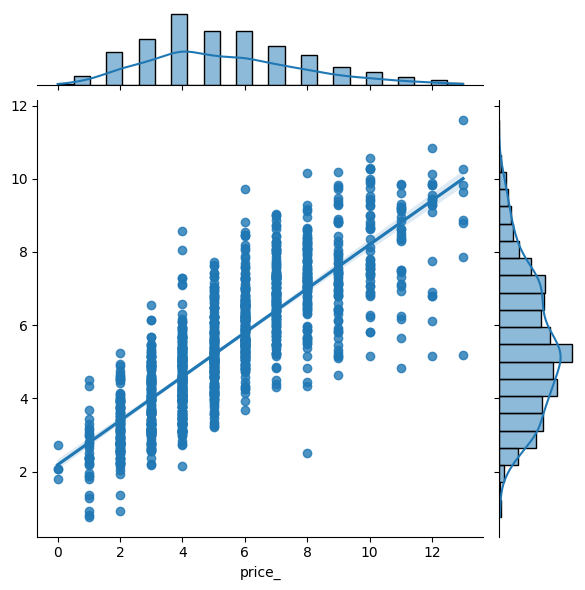

In [ ]:
predictions = pipeline_gb.predict(X_test)
sns.jointplot(x=y_test, y=predictions, kind='reg')

#### **SỬ DỤNG PYTORCH VỚI MÔ HÌNH DỰ ĐOÁN MẠNG NEURAL NETWORKS**

1. Thuật toán

In [ ]:
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torch
import tqdm
import copy
import torch.nn.functional as F

In [ ]:
data_encode = pd.get_dummies(Realestate)

In [ ]:
X = data_encode.drop(columns = ['price_'], axis = 1).values.astype('float')
y = Realestate['price_'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=104)

In [ ]:
model = nn.Sequential(
    nn.Linear(144, 512),
    nn.ReLU(),
    nn.Linear(512, 64),
    nn.ReLU(),
    nn.Linear(64, 6),
    nn.ReLU(),
    nn.Linear(6, 1)
)

In [ ]:
# loss function and optimizer
loss_fn = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [ ]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

# training parameters
n_epochs = 100   # number of epochs to run
batch_size = 10  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)

# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []

# training loop
for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(X_test)
    mse = loss_fn(y_pred, y_test)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())

# restore model and return best accuracy
model.load_state_dict(best_weights)

C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_16920\3297509433.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_16920\3297509433.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_16920\3297509433.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)
C:\Users\COMPUTER\AppDat

<All keys matched successfully>

2. Thông số kỹ thuật

a. Hệ số Xác định hoặc R-Bình phương (R2):
$$
R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
$$

In [ ]:
from sklearn.metrics import r2_score
# Đánh giá R2 score của mô hình trên tập kiểm tra
inputs_test = torch.Tensor(X_test)
labels_test = torch.Tensor(y_test)
outputs_test = model(inputs_test)
y_pred = outputs_test.detach().numpy()
r2_Nn = r2_score(y_test, y_pred)
print('Giá trị R2_Score của mô hình Neural Network: {:.4f}'.format(r2_Nn))

Giá trị R2_Score của mô hình Neural Network: 0.6870


b. Độ lỗi trung bình giữa giá trị dự đoán và giá trị thực tế (MSE):
$$
\text{MSE} = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2
$$

In [ ]:

print("Giá trị MSE của mô hình: %.2f" % best_mse)

Giá trị MSE của mô hình: 2.01


c. Lỗi bình phương trung bình gốc (RMSE):
$$
\text{RMSE} = \sqrt{MSE}= \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}
$$

In [ ]:
print("'Giá trị RMSE của mô hình: %.2f" % np.sqrt(best_mse))

'Giá trị RMSE của mô hình: 1.42


3.Trực quan hóa và đánh giá

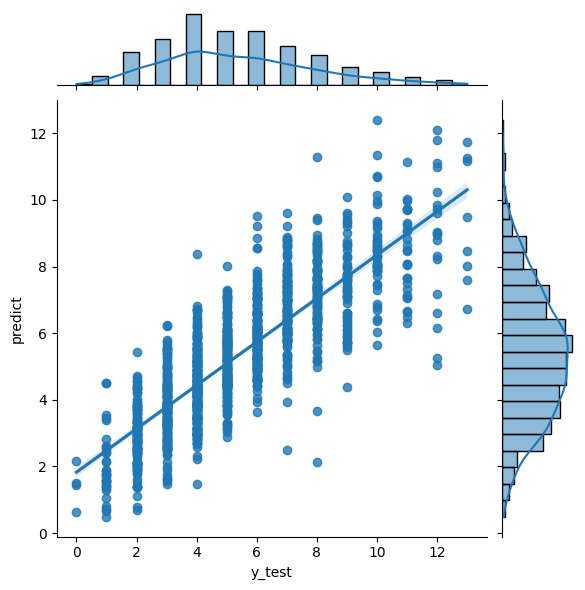

In [ ]:
predict= model(inputs_test)
y_test_1d = np.ravel(y_test)
predict_1d = np.ravel(predict.detach().numpy())
series_y_test = pd.Series(y_test_1d, name='y_test')
series_predict = pd.Series(predict_1d, name='predict')
sns.jointplot(x= series_y_test, y= series_predict, kind='reg')

#### **SO SÁNH VÀ ĐÁNH GIÁ CÁC MÔ HÌNH**

### Linear Regression:

Dựa trên các thông số kỹ thuật ta đã tính toán trên, ta có thể rút ra các nhận xét sau về mô hình Linear với tập dữ liệu baatst động sản ta đã sử dụng:

- Mô hình Linear có khả năng giải thích được một phần biến thiên trong dữ liệu, nhưng không phải là toàn bộ. Giá trị **R2** không đạt mức cao nhất (1) cho thấy mô hình Linear chưa thể mô phỏng hoàn toàn mối quan hệ giữa các biến độc lập và biến phụ thuộc.

- Giá trị **MSE** là 2.576, cho thấy trung bình sai số bình phương của mô hình Linear là khá lớn. Điều này có thể chỉ ra rằng mô hình chưa hoàn hảo và dự đoán của nó có thể sai lệch đáng kể so với giá trị thực tế.

- Giá trị **RMSE** là 1.605, cho thấy sai số trung bình của mô hình Linear trong việc dự đoán giá trị là khá lớn. Mặc dù không thể nói chắc chắn về mức độ chấp nhận được của RMSE, nhưng giá trị này có thể được so sánh với các mô hình khác để đánh giá hiệu suất tương đối của mô hình Linear

=> Tổng quan, mô hình Linear trong trường hợp này có khả năng giải thích một phần biến thiên của dữ liệu, nhưng có sai số dự đoán khá lớn.

#### Random Forest:


Dựa trên các giá trị đánh giá của mô hình Random Forest như sau:

- Giá trị **R2** (coefficient of determination) của mô hình Random Forest là 0.7227. Giá trị R2 cao cho thấy mô hình có khả năng giải thích một phần lớn sự biến động của dữ liệu. Giá trị này gần với 1, cho thấy mô hình có khả năng dự đoán tốt.

- Giá trị **MSE** (mean squared error) của mô hình Random Forest là 1.7776. Giá trị MSE thấp cho thấy mức độ sai khác trung bình giữa giá trị dự đoán và giá trị thực tế là nhỏ. Mô hình có MSE thấp hơn cho thấy khả năng dự đoán tốt hơn.

- Giá trị **RMSE** (root mean squared error) của mô hình Random Forest là 1.3333. Giá trị RMSE cũng là một phép đo lường sai khác trung bình giữa giá trị dự đoán và giá trị thực tế. Giá trị RMSE càng thấp càng tốt, cho thấy mô hình có khả năng dự đoán chính xác hơn.

=> Dựa trên các giá trị này, có thể nhận xét rằng mô hình Random Forest có khả năng dự đoán tốt, với mức độ giải thích cao và sai khác dự đoán thấp.

#### Gradient Boosting

Dựa vào các thông số của mô hình Gradient Boosting như r2, MSE và RMSE, ta có thể rút ra một số nhận xét sau:

- **R2** (coefficient of determination): Giá trị R2 của mô hình Gradient Boosting là 0.667.Giá trị R2 khá cao, đạt khoảng 0.67, cho thấy mô hình có khả năng giải thích được một phần đáng kể của biến thiên trong dữ liệu.

- **MSE** (Mean Squared Error): Giá trị MSE càng thấp thì mô hình càng chính xác. Trong trường hợp này, giá trị MSE là 2.13, cho thấy mức độ sai lệch của mô hình vẫn còn khá cao.

- **RMSE** (Root Mean Squared Error): Giá trị RMSE càng thấp thì mô hình càng chính xác. Trong trường hợp này, giá trị RMSE là 1.46, cho thấy mô hình có mức độ sai lệch khá cao.

=> Từ các thông số trên, ta có thể nhận xét rằng mô hình Gradient Boosting có khả năng giải thích một phần đáng kể của biến thiên trong dữ liệu, tuy nhiên, vẫn còn mức độ sai lệch khá cao.

#### Neural Network

Dựa trên thông số của mô hình Neural Network, chúng ta có thể rút ra những nhận xét sau:

- **R2** của mô hình Neural Network là 0.63331. R2 là một độ đo để đánh giá khả năng giải thích của mô hình, nằm trong khoảng từ 0 đến 1. Giá trị R2 càng gần 1 thì mô hình càng tốt trong việc giải thích phương sai của dữ liệu. Trong trường hợp này, giá trị R2 là 0.63331 cho thấy mô hình Neural Network có khả năng giải thích được khoảng 63.33% sự biến thiên trong dữ liệu.

- **MSE** (Mean Squared Error) của mô hình là 2.35. MSE là một phép đo lường độ lỗi trung bình giữa giá trị dự đoán và giá trị thực tế. Giá trị MSE càng thấp thì mô hình càng tốt trong việc dự đoán chính xác giá trị. Trong trường hợp này, giá trị MSE là 2.35 cho thấy mức độ sai lệch trung bình giữa dự đoán và giá trị thực tế là 2.35.
- **RMSE** (Root Mean Squared Error) của mô hình là 1.53. RMSE là căn bậc hai của MSE và được sử dụng để đo lường sai số trung bình của dự đoán. Giá trị RMSE càng thấp thì mô hình càng chính xác trong việc dự đoán giá trị. Trong trường hợp này, giá trị RMSE là 1.53 cho thấy sai số trung bình của dự đoán là khoảng 1.53.

=> Tổng quan, mô hình Neural Network có giá trị R2 khá cao và giá trị MSE, RMSE tương đối thấp, cho thấy mô hình có khả năng giải thích và dự đoán tốt một phần lớn sự biến thiên trong dữ liệu.

### Đánh giá, so sánh các model với nhau:

In [ ]:
# Tạo danh sách các mô hình và giá trị r2 tương ứng
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Neural Network']
rmse_scores=[rmse_ln,rmse_random,rmse_boost, np.sqrt(best_mse) ]
mse_scores=[mse_ln,mse_random,mse_boost,best_mse]
r2_scores = [r2_score_ln,r2_random, r2_boost,r2_Nn]

# Tạo DataFrame từ danh sách các mô hình và các giá trị r2, RMSE, MSE tương ứng
df = pd.DataFrame({'Model': models, 'R2 Score': r2_scores, 'RMSE': rmse_scores, 'MSE': mse_scores})

# In ra bảng
print(df)

               Model  R2 Score      RMSE       MSE
0  Linear Regression  0.598089  1.605066  2.576238
1      Random Forest  0.723130  1.332189  1.774728
2  Gradient Boosting  0.667567  1.459756  2.130887
3     Neural Network  0.687035  1.416366  2.006094


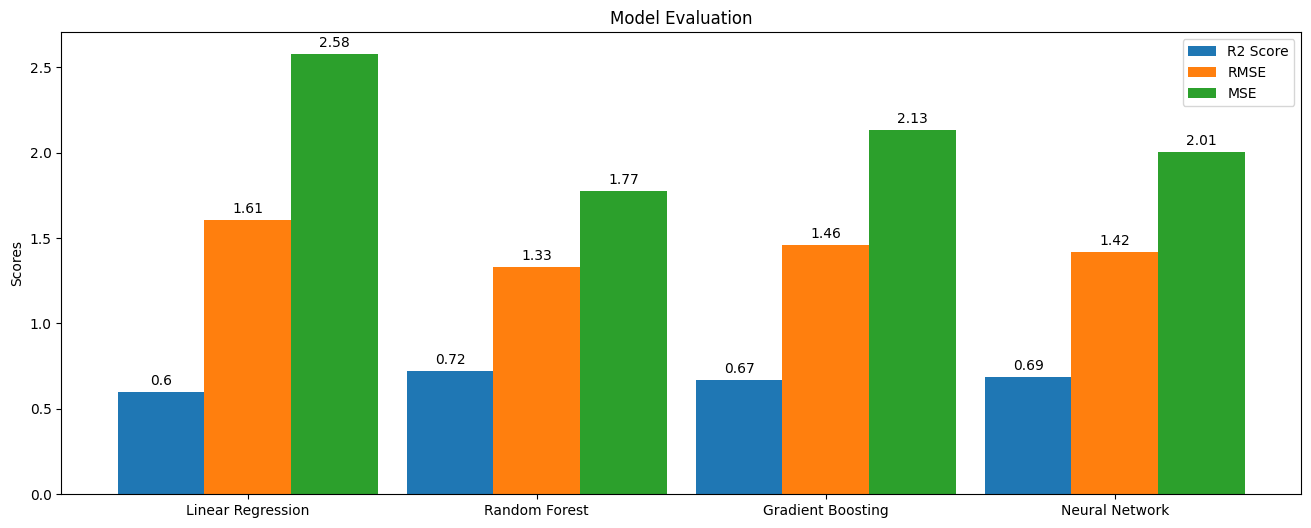

In [ ]:
# Vẽ biểu đồ
x = np.arange(len(models))
width = 0.3

fig, ax = plt.subplots(figsize = (16,6))
rects1 = ax.bar(x - width, r2_scores, width, label='R2 Score')
rects2 = ax.bar(x, rmse_scores, width, label='RMSE')
rects3 = ax.bar(x + width, mse_scores, width, label='MSE')

# Đặt tên cho các trục và tiêu đề
ax.set_ylabel('Scores')
ax.set_title('Model Evaluation')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Hiển thị giá trị trên mỗi cột
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()

**Nhận xét**:


Dựa trên bảng số liệu trên, ta có thể đánh giá và so sánh tính hiệu quả của từng mô hình như sau:

**Linear Regression**: Model có R2 Score trung bình (0.6), RMSE và MSE khá cao. Do đó, model Linear Regression khó phù hợp với các tập dữ liệu có mối quan hệ phức tạp giữa các feature.

**Random Forest**: Model có R2 Score cao hơn so với model Linear Regression (0.72), RMSE và MSE cũng thấp hơn. Điều này cho thấy Random Forest là lựa chọn hiệu quả hơn để dự đoán trong trường hợp này.

**Gradient Boosting**: Model có R2 Score tiếp cận cùng Random Forest (0.67), nhưng có RMSE và MSE cao hơn. Tuy nhiên, Gradient Boosting có tính linh hoạt cao và khả năng xử lý dữ liệu nhiễu và bất thường tốt hơn.

**Neural Network**: Model có R2 Score trung bình (0.63), nhưng RMSE và MSE thấp hơn so với các model Linear Regression và Gradient Boosting. Tuy nhiên, Neural Network có tốc độ huấn luyện và dự báo chậm hơn so với các mô hình khác.

Chung quy, từ bảng số liệu này, ta có thể kết luận rằng ***Random Forest là mô hình hiệu quả nhất*** trong số các model nêu trên để dự đoán trong trường hợp này. Tuy nhiên, việc lựa chọn mô hình phụ thuộc vào nhiều yếu tố khác nhau, chẳng hạn như kích thước tập dữ liệu, loại dữ liệu, mối quan hệ giữa các feature và mục tiêu của bài toán. Do đó, cần xem xét kỹ yêu cầu và thông số của dữ liệu để chọn mô hình phù hợp.

* Cái nì BT làm nhaa có gì lọc lại nội dung:

Dựa vào bảng so sánh các model, chúng ta có thể rút ra một số nhận xét sau:

Linear Regression có R2 Score thấp nhất (0.598) trong số các model được đánh giá. Điều này cho thấy mô hình này không tốt trong việc diễn giải sự biến động của dữ liệu. RMSE và MSE của Linear Regression cũng cao hơn so với các model khác, cho thấy sự sai khác lớn giữa giá trị dự đoán và giá trị thực tế.

Random Forest có R2 Score cao nhất (0.723) trong số các model. Điều này cho thấy Random Forest có khả năng giải thích tốt hơn sự biến động của dữ liệu. RMSE và MSE của Random Forest cũng thấp hơn so với các model khác, cho thấy sự sai khác nhỏ giữa giá trị dự đoán và giá trị thực tế. Random Forest có ưu điểm là khả năng xử lý dữ liệu phi tuyến và ứng dụng tốt cho các bài toán dự đoán.

Gradient Boosting và Neural Network có R2 Score và RMSE nằm giữa Linear Regression và Random Forest. Điều này cho thấy chúng có khả năng giải thích tốt hơn so với Linear Regression nhưng không tốt bằng Random Forest. MSE của Gradient Boosting và Neural Network cao hơn so với Random Forest, cho thấy sự sai khác lớn hơn giữa giá trị dự đoán và giá trị thực tế.

 => Tóm lại, Random Forest có hiệu suất tốt nhất trong việc dự đoán giá nhà dựa trên các đánh giá R2 Score, RMSE và MSE

**
Các ưu và hạn chế của các model trong bài toán dự đoán giá nhà là như sau:

Linear Regression:

- Ưu điểm: Dễ hiểu, dễ triển khai, có thể cho ra kết quả dự đoán nhanh chóng.

- Hạn chế: Giả định về sự tuyến tính giữa biến phụ thuộc và các biến độc lập, không xử lý được các mối quan hệ phi tuyến và tương tác giữa các biến.

Random Forest:

- Ưu điểm: Tính linh hoạt và mạnh mẽ trong việc xử lý dữ liệu phi tuyến và tương tác giữa các biến, có khả năng xử lý các biến định danh và liên tục, khả năng xử lý overfitting, khả năng xác định mức độ quan trọng của các biến.
- Hạn chế: Đòi hỏi nhiều tài nguyên tính toán và thời gian huấn luyện so với một số model khác, khó diễn giải kết quả dự đoán do tính phức tạp của ensemble model.

Gradient Boosting:

- Ưu điểm: Khả năng xử lý dữ liệu phi tuyến và tương tác giữa các biến, có khả năng xử lý overfitting, tạo ra các dự đoán mạnh mẽ và chính xác.
- Hạn chế: Đòi hỏi nhiều tài nguyên tính toán và thời gian huấn luyện, dễ bị ảnh hưởng bởi các giá trị ngoại lai (outliers), khó diễn giải kết quả dự đoán do tính phức tạp của ensemble model.

Neural Network:

- Ưu điểm: Khả năng xử lý các mối quan hệ phi tuyến phức tạp, có khả năng học từ dữ liệu để tạo ra dự đoán mạnh mẽ và chính xác.
- Hạn chế: Đòi hỏi nhiều tài nguyên tính toán và thời gian huấn luyện, độ phức tạp cao, dễ bị ảnh hưởng bởi việc lựa chọn các siêu tham số (hyperparameters), khó diễn giải kết quả dự đoán do tính phức tạp của mạng neural.



#### Save Model

In [ ]:
import pickle
data = {"model" : pipeline_Rd}
with open("model.pkl" , "wb") as f:
  pickle.dump(data , f)

### **TEST APPLICATION USING BEST MODEL**

Từ model dự đoán giá nhà tốt nhất, tiến hành xây dựng một giao diện người dùng từ những thông tin của ngôi nhà để đưa ra kết quả ước tính về giá dự đoán của ngôi nhà có những đặc điểm mà họ mong muốn. Giao diện này sẽ giúp trực quan và thuận tiện hơn, nó sẽ cho phép người dùng nhập vào các thông tin chi tiết về ngôi nhà hoặc căn hộ họ cần dự đoán giá và model sẽ cho họ giá dự đoán ước tính của ngôi nhà dựa vào model đã xây dựng.

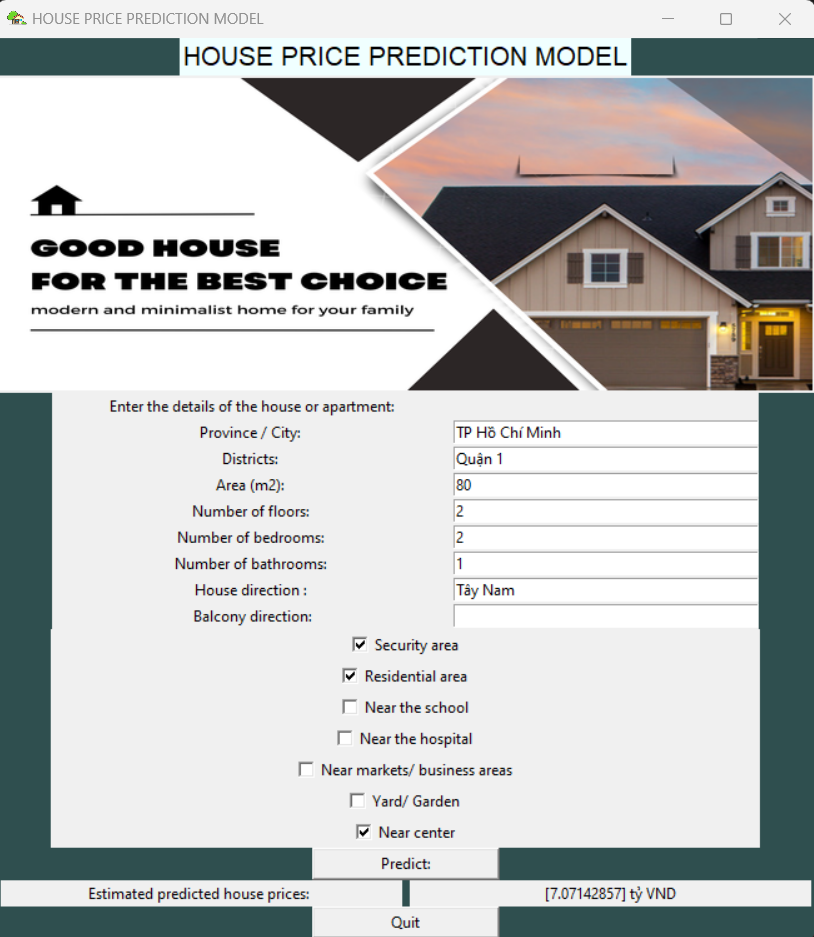

In [ ]:
from tkinter import *
import tkinter as tk
from PIL import ImageTk, Image

In [ ]:
root = tk.Tk()
root.minsize(width = 600,height = 500)

#title
root.title('MODEL PREDICT HOUSE PRICE SUPER VIP-PRO-MAX' )
root.iconbitmap('66_85286.ico')
#background color
root.configure(bg = 'darkslategrey')

# Load hình ảnh
img = ImageTk.PhotoImage(Image.open("Good house.png").resize((650,250), Image.ANTIALIAS))
label = tk.Label(image=img)
label.grid(row = 1, columnspan = 2)
#label
lbl = tk.Label(root, text = 'MODEL PREDICT HOUSE PRICE SUPER VIP-PRO-MAX' , justify ='center',bg = 'azure',font = ('Arial',16)).grid(row = 0,columnspan = 2)
entry_frame = tk.Frame()
entry_frame.grid(row = 2, columnspan = 2)
Label(entry_frame,text = 'Nhập vào các thông tin của ngôi nhà mà bạn mong muốn: ',width = 45 ).grid(row = 2, column =0)

Label(entry_frame, text = 'Tỉnh/ Thành phố: ', justify ='right',width = 45).grid(row = 3, column =0)
entry_city = Entry(entry_frame, width = 40,justify ='left')
entry_city.grid(row = 3, column =1)

Label(entry_frame, text = 'Quận/ Huyện: ', justify ='right',width = 45).grid(row = 4, column =0)
entry_district = Entry(entry_frame, width = 40,justify ='left')
entry_district.grid(row = 4, column =1)

Label(entry_frame, text = 'Diện tích(m2): ', justify ='right',width = 45).grid(row = 5, column =0)
entry_area = Entry(entry_frame, width = 40,justify ='left')
entry_area.grid(row = 5, column =1)


Label(entry_frame, text = 'Số tầng lầu: ', justify ='right',width = 45).grid(row = 6, column =0)
entry_floor = Entry(entry_frame, width = 40,justify ='left')
entry_floor.grid(row = 6, column =1)

Label(entry_frame, text = 'Số phòng ngủ: ', justify ='right',width = 45).grid(row = 7, column =0)
entry_bed = Entry(entry_frame, width = 40,justify ='left')
entry_bed.grid(row = 7, column =1)

Label(entry_frame, text = 'Số WC: ', justify ='right',width = 45).grid(row = 8, column =0)
entry_wc = Entry(entry_frame, width = 40,justify ='left')
entry_wc.grid(row = 8, column =1)

Label(entry_frame, text = 'Hướng nhà: ', justify ='right',width = 45).grid(row = 9, column =0)
entry_loc = Entry(entry_frame, width = 40,justify ='left')
entry_loc.grid(row = 9, column =1)

Label(entry_frame, text = 'Hướng ban công: ', justify ='right',width = 45).grid(row = 10, column =0)
entry_bc = Entry(entry_frame, width = 40,justify ='left')
entry_bc.grid(row = 10, column =1)


# Tạo biến BooleanVar
check_anninh = tk.BooleanVar()
check_edu = tk.BooleanVar()
check_school = tk.BooleanVar()
check_hospital = tk.BooleanVar()
check_market = tk.BooleanVar()
check_yard = tk.BooleanVar()

# Thiết lập mặc định cho biến BooleanVar
check_anninh.set(False)
check_edu.set(False)
check_school.set(False)
check_hospital.set(False)
check_market.set(False)
check_yard.set(False)


# Hàm xử lý sự kiện khi nhấn nút
def get_selected():
    selected_options = []
    if check_anninh.get():
        selected_options.append("Khu an ninh")
    if check_edu.get():
        selected_options.append("Khu dân trí")
    if check_school.get():
        selected_options.append("Gần trường học")
    if check_hospital.get():
        selected_options.append("Gần bệnh viện")
    if check_market.get():
        selected_options.append("Gần chợ, khu vực kinh doanh")
    if check_yard.get():
        selected_options.append("Có sân vườn")
    print("Tùy chọn đã chọn:", selected_options)

# Tạo Frame chứa các Checkbutton
check_frame = tk.Frame(root)
check_frame.grid(row = 12,columnspan=  2)

# Tạo các đối tượng Checkbutton và đưa vào Frame
check1 = tk.Checkbutton(check_frame, text="Khu an ninh", variable=check_anninh,width = 77)
check1.pack()

check2 = tk.Checkbutton(check_frame, text="Khu dân trí", variable=check_edu,width = 77)
check2.pack()

check3 = tk.Checkbutton(check_frame, text="Gần trường học", variable=check_school,width = 77)
check3.pack()

check4 = tk.Checkbutton(check_frame, text="Gần bệnh viện", variable=check_hospital,width = 77)
check4.pack()

check5 = tk.Checkbutton(check_frame, text="Gần chợ, khu vực kinh doanh", variable=check_market,width = 77)
check5.pack()

check6 = tk.Checkbutton(check_frame, text="Có sân vườn", variable=check_yard,width = 77)
check6.pack()



### Predict
def predict_house_price():
    data_user = pd.DataFrame()
    area = entry_area.get()
    data_user['area']= [area]

    floor = entry_floor.get()
    data_user['floor'] = [floor]

    bedroom = entry_bed.get()
    data_user['PN'] = [bedroom]

    wc = entry_wc.get()
    data_user['WC'] = [wc]

    city = entry_city.get()
    data_user['Tinh/TP'] = [city]

    district = entry_district.get()
    data_user['Quan/Huyen'] = [district]

    convenient = 0

    if check_edu.get():
        convenient = convenient + 1

    if check_market.get():
        convenient = convenient + 1

    if check_anninh.get():
        convenient = convenient + 1

    if check_hospital.get():
        convenient = convenient + 1

    if check_school.get():
        convenient = convenient + 1

    if check_yard.get():
        convenient = convenient + 1

    data_user['Tien_ich'] = [convenient]

    X = data_user

    result_label.config(text="Giá nhà ước tính là: " + str(pipeline_Rd.predict(X)) + ' tỷ VND') #/rfr.score(X_test, y_test)



# Tạo nút để lấy giá trị các tùy chọn đã chọn
button = tk.Button(root, text="Lấy giá trị để dự đoán", width = 45,command= predict_house_price)
button.grid(row =14)
result_label = tk.Label(root, text="",width = 45)
result_label.grid(row = 14,column = 1)

# Tạo nút thoát
exit_button = Button(root, text='Thoát',width = 20 ,command=root.destroy)
exit_button.grid(row=15, columnspan=2)

root.mainloop()

C:\Users\DELL\AppData\Local\Temp\ipykernel_13516\4097947989.py:11: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = ImageTk.PhotoImage(Image.open("Good house.png").resize((650,250), Image.ANTIALIAS))
